In [29]:
import numpy as np
import matplotlib.pyplot as plt

Let's create 500 samples per class

In [30]:
Nclass = 500

Create Gaussian clouds

In [31]:
X1 = np.random.randn(Nclass, 2) + np.array([0, -2]) # Centered at (0, -2)
X2 = np.random.randn(Nclass, 2) + np.array([2,2]) # Centered at (2, 2)
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2]) # Centered at (-2, 2)
X = np.vstack([X1, X2, X3])

In [32]:
Y = np.array([0]*Nclass + [1] * Nclass + [2]*Nclass) # Labels
print(Y.shape)
Y

(1500,)


array([0, 0, 0, ..., 2, 2, 2])

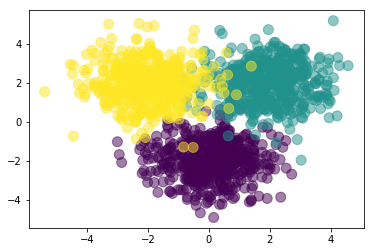

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

In [34]:
D = 2 # Dimensionality of input
M = 3 # Hidden layer size
K = 3 # Number of classes

Randomly initialize weights

In [35]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [36]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1) # value of hidden layer, sigmoid
    A = Z.dot(W2) + b2 # softmax of the next layer
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims = True)
    return Y

In [37]:
def classification_rate(Y, P):
    '''
    Y - targets
    P - predictions
    '''
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]: #if is correct
            n_correct += 1
    return float(n_correct) / n_total

In [38]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis = 1)

In [39]:
assert(len(P) == len(Y))

In [40]:
print('Classification rate for randomly chosen weights: ', classification_rate(Y, P))

Classification rate for randomly chosen weights:  0.3333333333333333
